In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [95]:
from functions import *
%reload_ext autoreload

In [96]:
df_demo = pd.read_csv('data/df_final_demo.txt')
df_demo.head()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0


In [97]:
df_demo = remove_nulls_and_duplicates(df_demo, threshold=0.8)

c:\Users\anano\OneDrive\Documentos\Ironhack\semana_5\project_semana_5\Vanguard-AB-Test-Analysis\functions.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.drop_duplicates(inplace=True)


In [98]:
df_demo = rename_columns_1(df_demo)

In [99]:
df_demo = mean_fill_missing_values(df_demo, 'client_age')

In [100]:
df_demo = convert_to_categorical(df_demo, 'gender')

client_tenure_years = permanencia_anual_cliente (años completos)

client_tenure_months = permanencia_mensual_cliente(meses, donde podemos apreciar si lleva por ejemplo un año y medio etc)

calls_last_6_months: Indica el número de veces que un cliente ha llamado al servicio de atención al cliente o a un asesor financiero en los últimos 6 meses. Estas llamadas podrían estar relacionadas con preguntas sobre inversiones, gestión de cuentas, soporte técnico, o cualquier otra consulta.
Posibles usos:
Evaluar la necesidad de asistencia del cliente.
Identificar clientes que necesitan más soporte o que podrían estar insatisfechos.
Analizar la relación entre la frecuencia de llamadas y la rentabilidad de las inversiones del cliente.

logons_last_6_months:
Muestra cuántas veces un cliente ha iniciado sesión en su cuenta de la plataforma de inversiones en los últimos 6 meses. Esto refleja su nivel de actividad o engagement con la web de inversiones.
Posibles usos:
Medir el interés del cliente en su portafolio de inversiones.
Identificar a los usuarios más comprometidos que están monitoreando sus inversiones con frecuencia.
Detectar patrones de comportamiento, como picos de logins en momentos de alta volatilidad en los mercados financieros.

In [101]:
x_count = df_demo['gender'].value_counts()['X']



In [102]:
df_demo = df_demo.drop(df_demo[df_demo['gender'] == 'X'].index) 

In [103]:
df_demo['gender'] = df_demo['gender'].cat.remove_unused_categories()


the clients have 1 to 8 accounts

In [104]:
df_demo.num_accounts.value_counts()

num_accounts
2.0    55495
3.0    12528
4.0     2241
5.0      284
6.0       33
7.0        8
1.0        2
8.0        1
Name: count, dtype: int64

the majority have 2 accounts

In [105]:
df_demo.num_accounts.value_counts().idxmax()

2.0

Los clientes han hecho de 0 a 7 llamadas

In [106]:
df_demo.calls_last_6_months.value_counts()

calls_last_6_months
6.0    14111
1.0    11015
2.0    10252
3.0     8752
0.0     7732
4.0     7174
5.0     6627
7.0     4929
Name: count, dtype: int64

La mayoria han hecho 6 llamadas

In [107]:
df_demo.calls_last_6_months.value_counts().idxmax()

6.0

inicio de sesion de 1 a 9 veces

In [108]:
df_demo.logons_last_6_months.value_counts()

logons_last_6_months
9.0    12349
3.0    10243
4.0    10219
7.0     9893
5.0     9253
6.0     7878
8.0     4810
2.0     3009
1.0     2938
Name: count, dtype: int64

la gran mayoria han accedido 9 veces

In [109]:
df_demo.logons_last_6_months.value_counts().idxmax()

9.0

In [110]:
df_demo.head(5)

,client_id,client_tenure_years,client_tenure_months,client_age,gender,num_accounts,balance,calls_last_6_months,logons_last_6_months
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0


In [111]:
df_demo.describe().round(2)

,client_id,client_tenure_years,client_tenure_months,client_age,num_accounts,balance,calls_last_6_months,logons_last_6_months
count,70592.00,70592.00,70592.00,70592.00,70592.00,70592.00,70592.00,70592.00
mean,5005061.51,12.05,150.66,46.44,2.26,147450.34,3.38,5.57
std,2877304.40,6.87,82.09,15.59,0.53,301514.10,2.24,2.35
min,169.00,2.00,33.00,13.50,1.00,13789.42,0.00,1.00
25%,2519666.25,6.00,82.00,32.50,2.00,37348.56,1.00,4.00
50%,5016973.50,11.00,136.00,47.00,2.00,63336.58,3.00,5.00
75%,7483122.50,16.00,192.00,59.00,2.00,137548.71,6.00,7.00
max,9999839.00,62.00,749.00,96.00,8.00,16320040.15,7.00,9.00


## Client_tenure_years

Measures of Centrality

In [112]:
column_to_analyze = 'client_tenure_years'

# Calcular estadísticas para la columna seleccionada
centrality_tenure_years = calculate_centrality(df_demo, column_to_analyze)
centrality_tenure_years

{'Mean': 12.05, 'Median': 11.0, 'Mode': 6.0}

Measures of Dispersion

In [113]:
column_to_analyze = 'client_tenure_years'

# Calcular estadísticas para la columna seleccionada
dispersion_tenure_years = calculate_dispersion(df_demo, column_to_analyze)
dispersion_tenure_years

{'Variance': 47.22,
 'Standard Deviation': 6.87,
 'Min': 2.0,
 'Max': 62.0,
 'Range': 60.0,
 'Quantiles': {0.25: 6.0, 0.5: 11.0, 0.75: 16.0}}

In [114]:
df_demo['client_tenure_years'].quantile(0.1) # We can get any quantile value, not just quartiles

5.0

## Client_tenure_months

Mesaures of Centrality

In [115]:
column_to_analyze = 'client_tenure_months'

# Calcular estadísticas para la columna seleccionada
centrality_tenure_months = calculate_centrality(df_demo, column_to_analyze)
centrality_tenure_months

{'Mean': 150.66, 'Median': 136.0, 'Mode': 58.0}

Measures of Dispersion

In [116]:
column_to_analyze = 'client_tenure_months'

# Calcular estadísticas para la columna seleccionada
dispersion_tenure_months = calculate_dispersion(df_demo, column_to_analyze)
dispersion_tenure_months

{'Variance': 6738.98,
 'Standard Deviation': 82.09,
 'Min': 33.0,
 'Max': 749.0,
 'Range': 716.0,
 'Quantiles': {0.25: 82.0, 0.5: 136.0, 0.75: 192.0}}

## Client_age

Mesaures of Centrality

In [117]:
column_to_analyze = 'client_age'

# Calcular estadísticas para la columna seleccionada
centrality_age = calculate_centrality(df_demo, column_to_analyze)
centrality_age 

{'Mean': 46.44, 'Median': 47.0, 'Mode': 58.5}

Measures of Dispersion

In [118]:
column_to_analyze = 'client_age'

# Calcular estadísticas para la columna seleccionada
dispersion_age= calculate_dispersion(df_demo, column_to_analyze)
dispersion_age

{'Variance': 243.09,
 'Standard Deviation': 15.59,
 'Min': 13.5,
 'Max': 96.0,
 'Range': 82.5,
 'Quantiles': {0.25: 32.5, 0.5: 47.0, 0.75: 59.0}}

## Num_accounts

Mesaures of Centrality

In [119]:
column_to_analyze = 'num_accounts'

# Calcular estadísticas para la columna seleccionada
centrality_accounts = calculate_centrality(df_demo, column_to_analyze)
centrality_accounts

{'Mean': 2.26, 'Median': 2.0, 'Mode': 2.0}

Measures of Dispersion

In [120]:
column_to_analyze = 'num_accounts'

# Calcular estadísticas para la columna seleccionada
dispersion_accounts = calculate_dispersion(df_demo, column_to_analyze)
dispersion_accounts

{'Variance': 0.29,
 'Standard Deviation': 0.53,
 'Min': 1.0,
 'Max': 8.0,
 'Range': 7.0,
 'Quantiles': {0.25: 2.0, 0.5: 2.0, 0.75: 2.0}}

## Balance

Mesaures of Centrality

In [121]:
column_to_analyze = 'balance'

# Calcular estadísticas para la columna seleccionada
centrality_balance = calculate_centrality(df_demo, column_to_analyze)
centrality_balance

{'Mean': 147450.34, 'Median': 63336.585, 'Mode': 31188.62}

Measures of Dispersion

In [122]:
column_to_analyze = 'balance'

# Calcular estadísticas para la columna seleccionada
dispersion_balance = calculate_dispersion(df_demo, column_to_analyze)
dispersion_balance

{'Variance': 90910751855.38,
 'Standard Deviation': 301514.1,
 'Min': 13789.419999999998,
 'Max': 16320040.15,
 'Range': 16306250.73,
 'Quantiles': {0.25: 37348.555, 0.5: 63336.585, 0.75: 137548.70500000002}}

## Calls_last_6_months

Mesaures of Centrality

In [123]:
column_to_analyze = 'calls_last_6_months'

# Calcular estadísticas para la columna seleccionada
centrality_calls = calculate_centrality(df_demo, column_to_analyze)
centrality_calls

{'Mean': 3.38, 'Median': 3.0, 'Mode': 6.0}

Measures of Dispersion

In [124]:
column_to_analyze = 'calls_last_6_months'

# Calcular estadísticas para la columna seleccionada
dispersion_calls = calculate_dispersion(df_demo, column_to_analyze)
dispersion_calls

{'Variance': 5.0,
 'Standard Deviation': 2.24,
 'Min': 0.0,
 'Max': 7.0,
 'Range': 7.0,
 'Quantiles': {0.25: 1.0, 0.5: 3.0, 0.75: 6.0}}

## Logons_last_6_months

Mesaures of Centrality

In [125]:
column_to_analyze = 'logons_last_6_months'

# Calcular estadísticas para la columna seleccionada
centrality_logons = calculate_centrality(df_demo, column_to_analyze)
centrality_logons

{'Mean': 5.57, 'Median': 5.0, 'Mode': 9.0}

Measures of Dispersion

In [126]:
column_to_analyze = 'logons_last_6_months'

# Calcular estadísticas para la columna seleccionada
dispersion_logons = calculate_dispersion(df_demo, column_to_analyze)
dispersion_logons

{'Variance': 5.54,
 'Standard Deviation': 2.35,
 'Min': 1.0,
 'Max': 9.0,
 'Range': 8.0,
 'Quantiles': {0.25: 4.0, 0.5: 5.0, 0.75: 7.0}}

## Shape of the Distribution

In [128]:
# Lista de columnas a analizar
columns_to_analyze = [
    'client_tenure_months',
    'client_age',
    'num_accounts',
    'balance',
    'calls_last_6_months',
    'logons_last_6_months'
]

In [129]:
# Calcular y mostrar asimetría y kurtosis para cada columna
for column in columns_to_analyze:
    statistics = calculate_skewness_kurtosis(df_demo, column)
    print(f"Statistics for {column}:")
    print(f"Skewness: {statistics['Skewness']}, Kurtosis: {statistics['Kurtosis']}\n")

Statistics for client_tenure_months:
Skewness: 1.05, Kurtosis: 1.1

Statistics for client_age:
Skewness: 0.08, Kurtosis: -0.93

Statistics for num_accounts:
Skewness: 2.29, Kurtosis: 6.09

Statistics for balance:
Skewness: 11.16, Kurtosis: 278.2

Statistics for calls_last_6_months:
Skewness: 0.05, Kurtosis: -1.33

Statistics for logons_last_6_months:
Skewness: -0.03, Kurtosis: -1.06



## Visualizations

Histograms

In [130]:
columns_to_plot = [
    'client_tenure_months',
    'client_age',
    'num_accounts',
    'balance',
    'calls_last_6_months',
    'logons_last_6_months'
]

In [131]:
# Configuración para los histogramas
plt.figure(figsize=(12, 10))

<Figure size 1200x1000 with 0 Axes>

<Figure size 1200x1000 with 0 Axes>

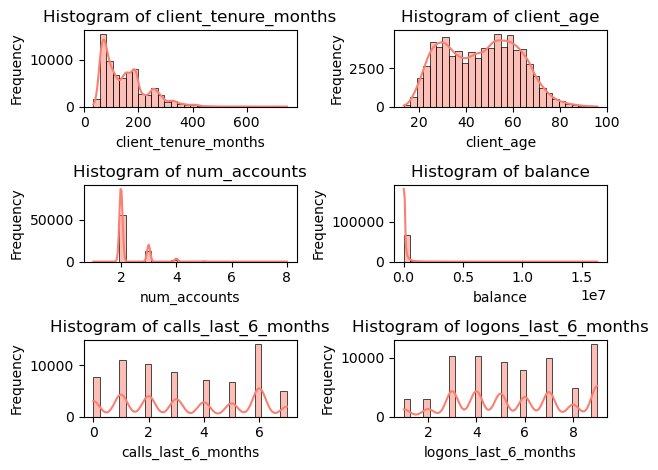

In [132]:
for i, column in enumerate(columns_to_plot, start=1):
    plt.subplot(3, 2, i)  # Configura el subplot
    sns.histplot(df_demo[column], kde=True, bins=30, color="salmon")
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()  # Ajusta el espaciado entre los subgráficos
plt.show()  # Muestra los gráficos

Box plots


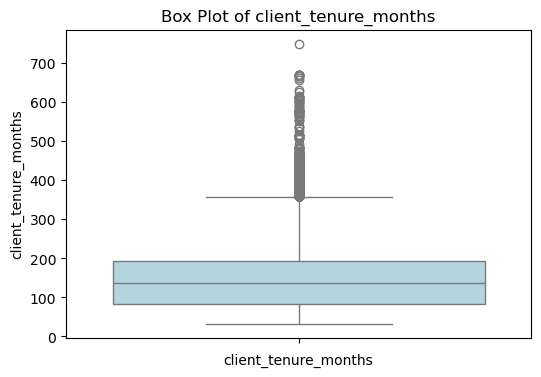

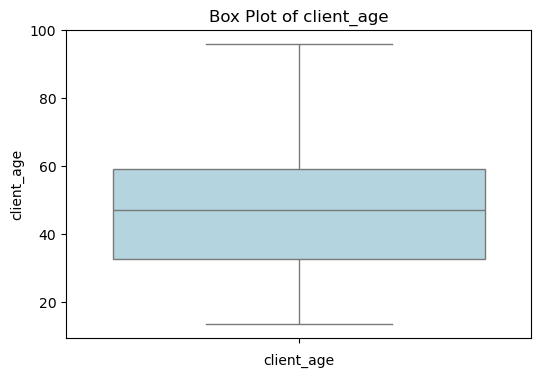

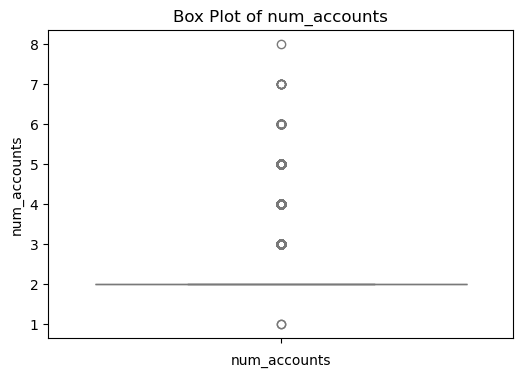

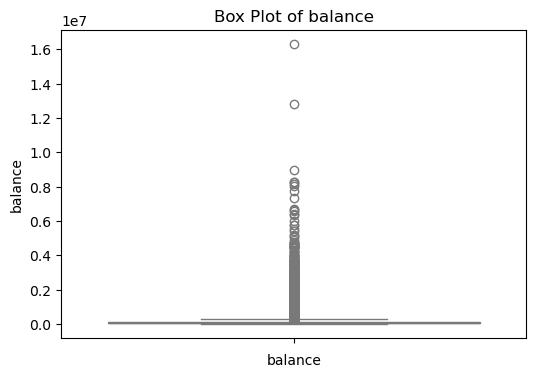

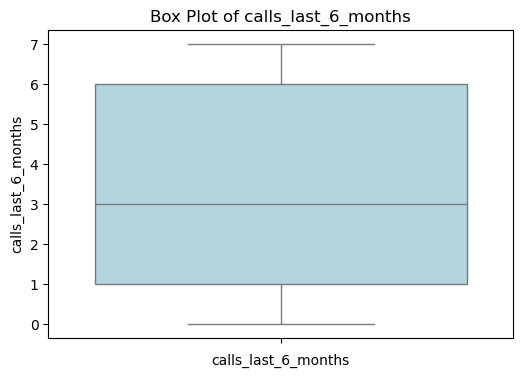

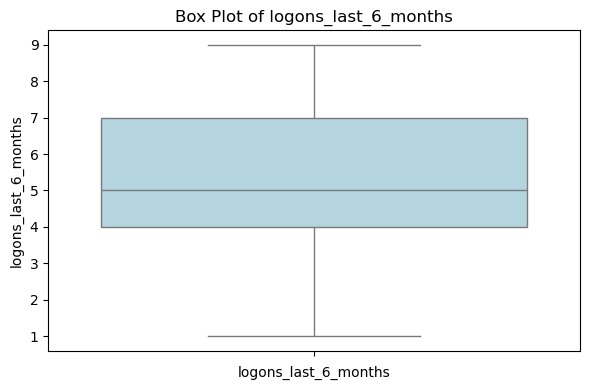

In [144]:
# Graficar box plots para cada variable de interés
variables = ['client_tenure_months', 'client_age', 'num_accounts', 'balance', 'calls_last_6_months', 'logons_last_6_months']

for variable in variables:
    #plt.subplot(3, 2, variables.index(variable) + 1)  # si queremos subgraficos
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df_demo[variable], color="lightblue")
    plt.title(f'Box Plot of {variable}')  # Título para cada gráfico
    plt.xlabel(variable)  # Etiqueta del eje X

plt.tight_layout()  # Ajustar el espacio entre subgráficos
plt.show()  # Mostrar la figura